In [52]:
%load_ext autoreload
%autoreload 2

from balance import QLearner
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Zadanie 1

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def mv_avg(values, window_size):
    values = np.array(values)
    return np.convolve(values, np.ones(window_size)/window_size, mode='valid')


In [54]:
def train_with_schedule(schedule: list[tuple]):
    results = []
    learner = QLearner()
    for steps, lr, er, dis in schedule:
        learner.lr = lr
        learner.exploration_rate = er
        learner.discount = dis

        r = learner.learn(steps)

        results.extend(r)
    
    return learner, results

#### Zdefiniowanie planu treningowego i wyświetlenie średniej kroczącej (1000 kroków)
Listę `plan1` należy czytać jako:
1. trenuj 4 tysiące kroków z learning rate `0.7`, experiment rate `0.25`, discount `0.97`
2. trenuj 3 tysiące kroków z learning rate `0.6`, experiment rate `0.2`, discount `0.98`
3. itd

In [56]:
plan1 = [
    (4_000, 0.7, 0.25, 0.97),
    (3_000, 0.6, 0.2, 0.98),
    (1_000, 0.5, 0.2, 0.98),
    (4_000, 0.4, 0.05, 0.98),
    (1_500, 0.2, 0.02, 0.99),
    (1_000, 0.1, 0.01, 0.99),
    (1_000, 0.05, 0.01, 0.99),
    (2_000, 0.04, 0.01, 0.995),
]


/home/bwisniewski/Documents/study/semestr_9/know-ml/venv/lib/python3.12/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Text(0, 0.5, 'Średnia krocząca reward')

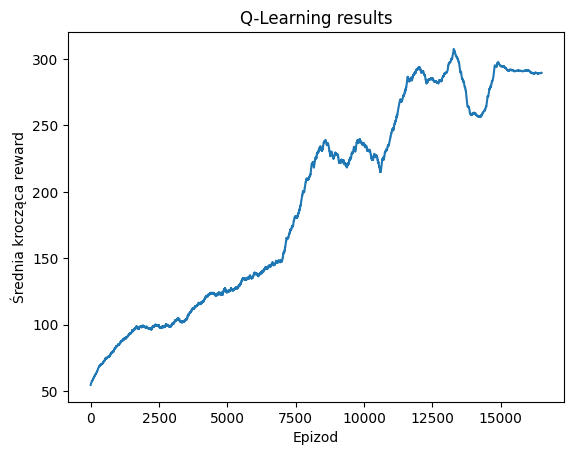

In [57]:
learner, results = train_with_schedule(plan1)

plt.plot(mv_avg(results, 1000))
plt.title("Q-Learning results")
plt.xlabel("Epizod")
plt.ylabel("Średnia krocząca reward")

Uwaga: Wykres ten i wszystkie kolejne pokazuje wartości "reward" z czasu treningu. Oznacza to, że agenci popełniali błędy przez losową eksplorację (zgodnie z `exploration rate`).

#### Policzenie "średniego wykresu" z 4 terningów z użyciem planu 1

In [15]:
results_multi = [train_with_schedule(plan1) for _ in range(4)]
res_m = np.array([mv_avg(m[1], 100) for m in results_multi])

In [16]:
import statistics

def std_over_time(results_multi):
    std = []
    mean = []
    for i in range(len(results_multi[0])):
        tmp = []
        for res in results_multi:
            tmp.append(res[i])
        
        std.append(statistics.stdev(tmp))
        mean.append(sum(tmp) / len(tmp))
    
    return mean, std

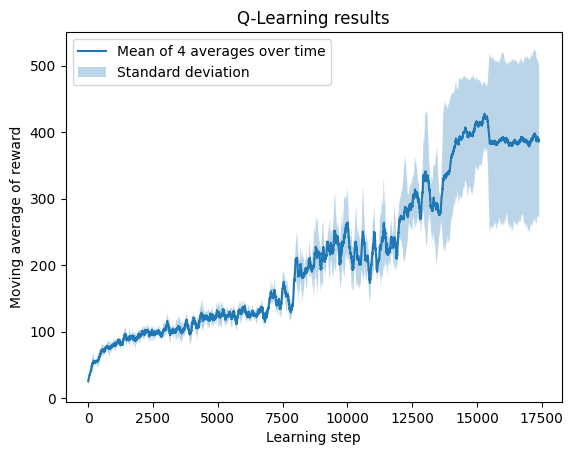

In [58]:
m, s = std_over_time(res_m)
m = np.array(m)
s = np.array(s)

plt.plot(range(len(m)), m, label="Mean of 4 averages over time")
plt.fill_between(range(len(m)), m - s, m + s, alpha=0.3, label="Standard deviation")
plt.xlabel("Learning step")
plt.ylabel("Moving average of reward")
plt.title("Q-Learning results")
plt.legend()

## Zadanie 2 - różne plany treningowe

In [59]:
def multi_train_with_plan(plan):
    tmp = [train_with_schedule(plan) for _ in range(4)]
    results_multi = [mv_avg(res, 100) for _, res in tmp]
    learners = [l for l, _ in tmp]

    m, s = std_over_time(results_multi)
    m = np.array(m)
    s = np.array(s)

    return learners, results_multi, (m, s)


def plot_with_std(m, s, name="", color=None):
    plt.plot(range(len(m)), m, label="Mean of 4 averages over time" + (" for " + name if name else ""), color=color)
    plt.fill_between(range(len(m)), m - s, m + s, alpha=0.3, label="Standard deviation" + (" for " + name if name else ""), color=color)
    plt.xlabel("Learning step")
    plt.ylabel("Moving average of reward")
    plt.title("Q-Learning results")
    plt.legend()

#### Zdefiniowanie planów treningowych

Za baseline uznaję `plan1` zdefiniowany wcześniej.
W kodzie poniżej komentarze czym poszczególne plany się różnią od baseline'u (`plan1`)

In [24]:
plan2 = [ # niski dicount
    (4_000, 0.7, 0.25, 0.9),
    (3_000, 0.6, 0.2, 0.95),
    (1_000, 0.5, 0.2, 0.95),
    (4_000, 0.4, 0.05, 0.95),
    (1_500, 0.2, 0.02, 0.97),
    (1_000, 0.1, 0.01, 0.97),
    (1_000, 0.05, 0.01, 0.97),
    (2_000, 0.04, 0.01, 0.99),
]

plan3 = [ # większy exploration trate
    (4_000, 0.7, 0.5, 0.97),
    (3_000, 0.6, 0.4, 0.98),
    (1_000, 0.5, 0.4, 0.98),
    (4_000, 0.4, 0.1, 0.98),
    (1_500, 0.2, 0.1, 0.99),
    (1_000, 0.1, 0.05, 0.99),
    (1_000, 0.05, 0.05, 0.99),
    (2_000, 0.04, 0.05, 0.995),
]

plan4 = [ # niższy learning rate
    (4_000, 0.4, 0.25, 0.97),
    (3_000, 0.3, 0.2, 0.98),
    (1_000, 0.25, 0.2, 0.98),
    (4_000, 0.25, 0.05, 0.98),
    (1_500, 0.1, 0.02, 0.99),
    (1_000, 0.01, 0.01, 0.99),
    (1_000, 0.005, 0.01, 0.99),
    (2_000, 0.004, 0.01, 0.995),
]

Uruchomienie treningu dla każdego z planów treningowych

In [ ]:
learners_plan2, results_plan2, (mean_plan2, std_plan2) = multi_train_with_plan(plan2)

In [ ]:
learners_plan3, results_plan3, (mean_plan3, std_plan3) = multi_train_with_plan(plan3)

In [ ]:
learners_plan4, results_plan4, (mean_plan4, std_plan4) = multi_train_with_plan(plan4)

#### Wyświetlenie uśrednionych wyników treningu wszystkich planów treningowych na jednym wykresie

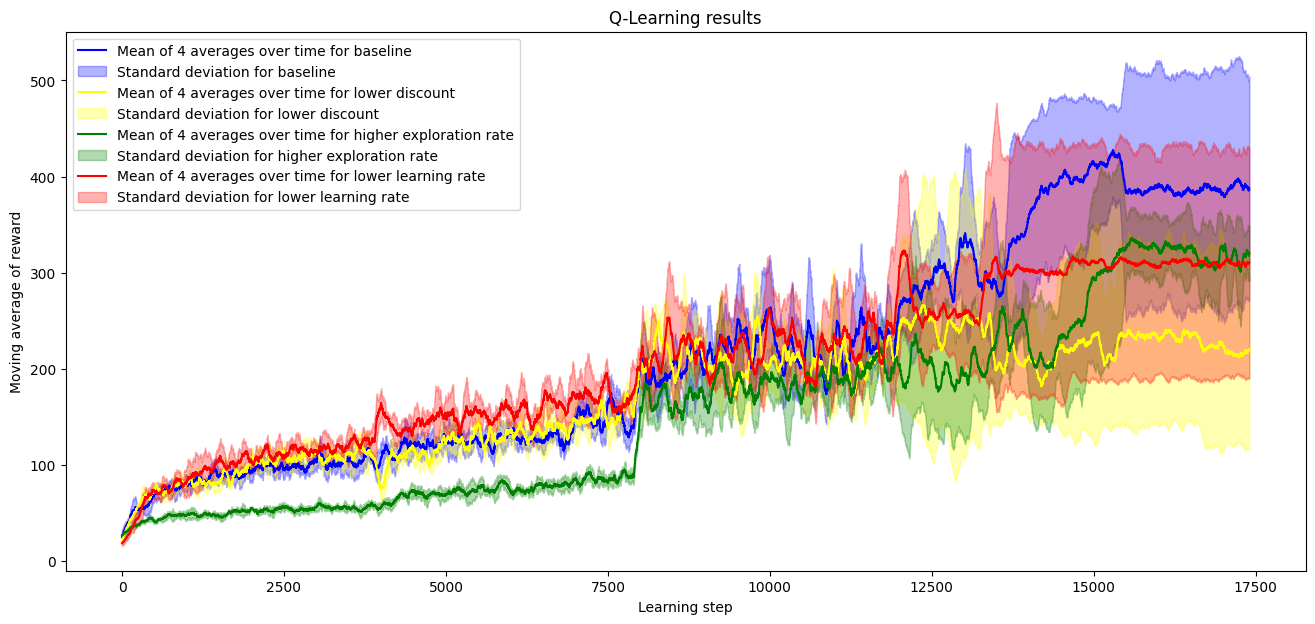

In [60]:
plt.figure(figsize=(16, 7))
plot_with_std(m, s, name="baseline", color='blue')
plot_with_std(mean_plan2, std_plan2, name="lower discount", color='yellow')
plot_with_std(mean_plan3, std_plan3, name="higher exploration rate", color='green')
plot_with_std(mean_plan4, std_plan4, name="lower learning rate", color='red')

Wnioski z tego wykresu:
- Niski `discount` powoduje, że agent nie jest w stanie wykorzystać już zebranej wiedzy i trening jest mniej efektywny w późniejszych fazach gdy tej wiedzy jest już dużo zaakumulowane
- Zbyt wysoki `exploration rate` też znacznie utrudnia naukę. Na wykresie widać, że po obniżeniu exploration rate z `0.4` do `0.1` nastąpił nagły skok w uzystkiwanch przez agenta wynikach
- Niski learning rate na początku przyspiesza proces uczenia, ale później z jakiegoś powodu powoduje wczesne nasycenie wiedzy agenta. Spodziewałbym się, że proces uczenia po prostu będzie wolniejszy. Możliwe, że agent utknął w jakimś maximum lokalnym (a większe learning raty go pominęły) z którego przez zbyt niski learning rate nie jest w stanie się wydostać.
- Starannie dobrany plan treningowy (niebieski kolor) się opłacił. Jest to plan osiągający najlepsze wyniki.

## Zadanie 3 - SARSA

In [36]:
def sarsa_train_with_schedule(schedule: list[tuple]):
    results = []
    learner = QLearner()
    for steps, lr, er, dis in schedule:
        learner.lr = lr
        learner.exploration_rate = er
        learner.discount = dis

        r = learner.learn(steps)

        results.extend(r)
    
    return learner, results

def sarsa_multi_train_with_plan(plan):
    tmp = [sarsa_train_with_schedule(plan) for _ in range(4)]
    results_multi = [mv_avg(res, 100) for _, res in tmp]
    learners = [l for l, _ in tmp]

    m, s = std_over_time(results_multi)
    m = np.array(m)
    s = np.array(s)

    return learners, results_multi, (m, s)

In [ ]:
sarsa_learners, sarsa_results, (sarsa_mean, sarsa_std) = sarsa_multi_train_with_plan(plan1)

Text(0.5, 1.0, 'Q-Learning vs SARSA')

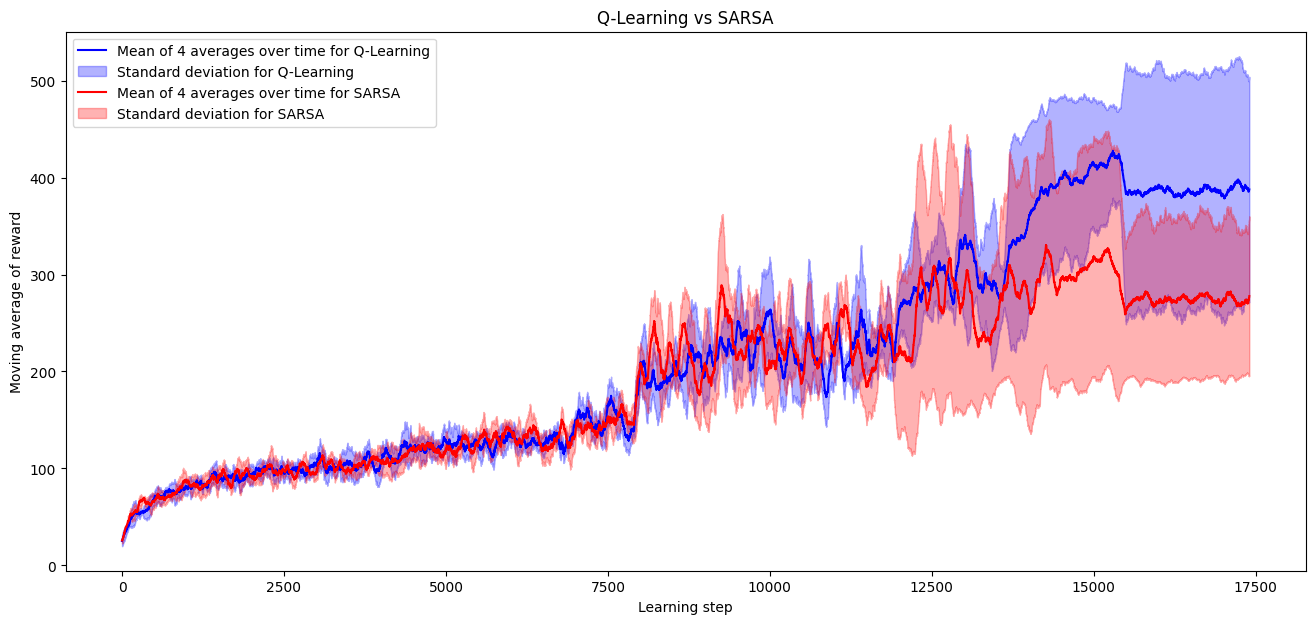

In [61]:
plt.figure(figsize=(16, 7))
plot_with_std(m, s, name="Q-Learning", color='blue')
plot_with_std(sarsa_mean, sarsa_std, name="SARSA", color='red')
plt.title("Q-Learning vs SARSA")


SARSA wypada tutaj gorzej w porównaniu z Q-Learning. Jednak plan treningowy w Q-Learningu został starannie dobrany. Ten sam plan wrzuciłem do SARSA, a i tak osiągnął przyzwoity wynik. Na początku SARSA uczył się dokładnie tak samo jak Q-Learning. Wskazuje to na to, że można tak dostroić plan treningu, żeby SARSA przynajmniej dorównał Q-Learning, a pewnie prześcignął.

### Zadanie 5 - Lunar Landing

In [44]:
from balance import LLQLearner

def ll_train_with_schedule(schedule: list[tuple]):
    results = []
    learner = LLQLearner()
    for steps, lr, er, dis in schedule:
        learner.lr = lr
        learner.exploration_rate = er
        learner.discount = dis

        r = learner.learn(steps)

        results.extend(r)
    
    return learner, results


In [ ]:
ll_learner, ll_results = ll_train_with_schedule(plan1)

Text(0.5, 1.0, 'Q-Learning results')

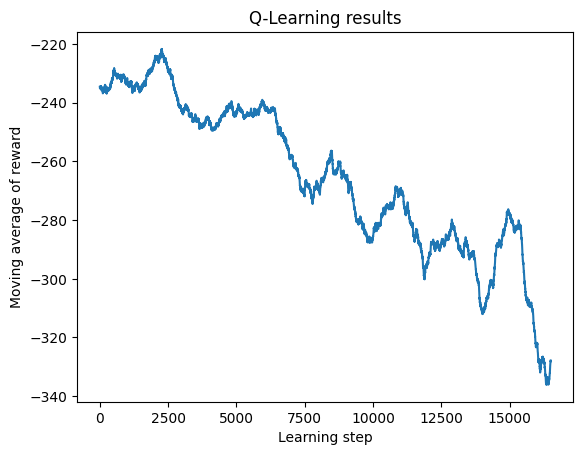

In [62]:
plt.plot(mv_avg(ll_results, 1000))
plt.xlabel("Learning step")
plt.ylabel("Moving average of reward")
plt.title("Q-Learning results")

Komentarz do wykresu: "It's evolving. Just backwards"